In [1]:
import numpy as np
import os
from PIL import Image

# Define the image size
IMG_SIZE = (224, 224)

# Define the path to the data directory
data_dir = "path to data directory"

# Define the labels
labels = ['Low', 'Medium', 'High']

# Load the data
X = []
y = []
for label in labels:
    label_dir = os.path.join(data_dir, label)
    for filename in os.listdir(label_dir):
        img = Image.open(os.path.join(label_dir, filename))
        img = img.resize(IMG_SIZE)
        img = np.array(img)
        X.append(img)
        y.append(labels.index(label))

# Convert the data to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the data
X = X.astype('float32')
X /= 255.0

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Load the original data
X_original = X # load original data here
y_original = y # load original labels here

# Create data generator
datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Fit the data generator on the original data
datagen.fit(X_original)

# Generate augmented data
n_gen = 20
X_augmented, y_augmented = [], []
for X_batch, y_batch in datagen.flow(X_original, y_original, batch_size=len(X_original), shuffle=False):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    n_gen -= 1
    if n_gen == 0:
        break

# Concatenate the original and augmented data
X = np.concatenate([X_original] + X_augmented, axis=0)
y = np.concatenate([y_original] + y_augmented, axis=0)


In [3]:
del X_original, y_original
del X_augmented, y_augmented
del datagen

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data = X_train # Split training data
labels = y_train # Split training labels

X_test = X_test # Test data
y_test = y_test # Test labels
del X, y

In [5]:
import pandas as pd

print(f'data shape:{data.shape}')
print(f'labels shape:{labels.shape}')
df = pd.DataFrame({"label":labels})
print(df.value_counts())
print("")
print(f'test_date shape:{X_test.shape}')
print(f'test_labels shape:{y_test.shape}')
df = pd.DataFrame({"test_labels":y_test})
print(df.value_counts())

data shape:(1512, 224, 224, 3)
labels shape:(1512,)
label
2        511
0        503
1        498
dtype: int64

test_date shape:(378, 224, 224, 3)
test_labels shape:(378,)
test_labels
1              132
0              127
2              119
dtype: int64


In [7]:
# Perform one-hot encoding on the labels
import keras
from tensorflow.keras.utils import to_categorical

num_classes = 3
labels = to_categorical(labels, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
del X_train, y_train

In [9]:
print(labels[0])
print(y_test[0])

[1. 0. 0.]
[1. 0. 0.]


c:\Users\Mohit yadav\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


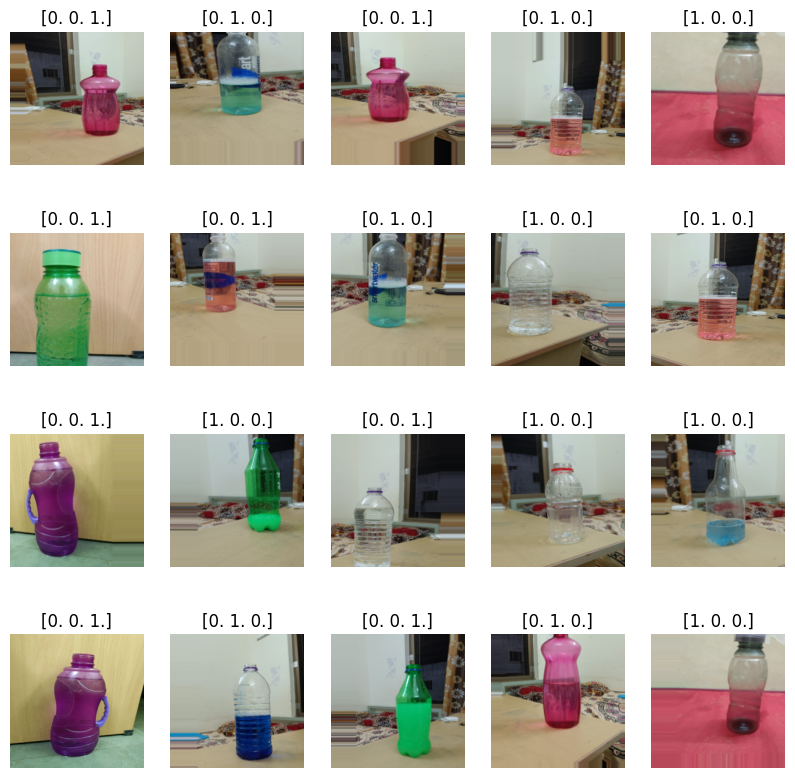

In [10]:

import matplotlib.pyplot as plt

# choose 20 random indices
indices = np.random.randint(0, len(data), 20)

# Get 20 sample images
sample_images = data[indices]

# Plot the images
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])

plt.show()

In [12]:
import keras
from tensorflow.keras.applications import VGG16
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for our classification task
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x) # use softmax activation for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with categorical cross-entropy loss and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
model.fit(data, labels, epochs=10, batch_size=32, validation_data=(X_test, y_test))

58900480/58889256 [==============================] - 6s 0us/step
Epoch 1/10
48/48 [==============================] - 185s 4s/step - loss: 1.7655 - accuracy: 0.5265 - val_loss: 0.5930 - val_accuracy: 0.7725
Epoch 2/10
48/48 [==============================] - 208s 4s/step - loss: 0.5422 - accuracy: 0.7751 - val_loss: 0.5623 - val_accuracy: 0.7619
Epoch 3/10
48/48 [==============================] - 207s 4s/step - loss: 0.4272 - accuracy: 0.8261 - val_loss: 0.4901 - val_accuracy: 0.7804
Epoch 4/10
48/48 [==============================] - 206s 4s/step - loss: 0.3274 - accuracy: 0.8651 - val_loss: 0.3212 - val_accuracy: 0.8757
Epoch 5/10
48/48 [==============================] - 202s 4s/step - loss: 0.2582 - accuracy: 0.8942 - val_loss: 0.2812 - val_accuracy: 0.8757
Epoch 6/10
48/48 [==============================] - 202s 4s/step - loss: 0.2615 - accuracy: 0.8942 - val_loss: 0.2769 - val_accuracy: 0.8915
Epoch 7/10
48/48 [==============================] - 222s 5s/step - loss: 0.1950 - accurac

In [ ]:
from IPython.display import Image

# Load the image data from the file saved in the first notebook
with open("image_data.png", "rb") as f:
    image_data = f.read()

# Display the image in the current notebook
Image(data=image_data)

In [ ]:
import cv2
import numpy as np

# image = Image.open(BytesIO(image_data))
# image = image.resize((224, 224))  # Resize the image to match your model's input size
# image_array = np.array(image)
# image_array = image_array.reshape((1,) + image_array.shape)

# Load the image you want to predict on
image = cv2.imread("image_data.png")
# Preprocess the image
image = cv2.resize(image, (224, 224))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
image = image.astype("float") / 255.0
image = np.expand_dims(image, axis=0)

# Make a prediction using the model
prediction = model.predict(image)

labels = ["Low", "Medium", "High"]
predicted_label = labels[np.argmax(prediction)]

# Print the predicted label
print("The predicted label is:", predicted_label)

print(prediction)